# **IMPORT LIBRARY**

In [ ]:
import tarfile
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import random
import matplotlib.pyplot as plt

# **LOAD AND DATASET PROCESSING**

Disini diekstrak email spam dari file spam.tar.bz2 dan non-spam dari easy_ham.tar.bz2 . Lalu dipersiapkan dataset dengan mengambil konten teks dari setiap file email dalam direktori spam dan non-spam dimana spam disimpan dalam variable spam_emails dan non_spam di ham_emails. teks email yang diambil kemudian digabungkan dalam variabel emails dan dibuat array labels dimana spam akan dilabeli 1 dan non spam dilabeli 0 dan akhirnya mengembalikan variabel email dan labels sebagai hasil processing.

In [ ]:
# Load the dataset and preprocess it
def load_dataset():
    # Extract spam emails
    tar_spam = tarfile.open("20021010_spam.tar.bz2", "r:bz2")
    tar_spam.extractall()
    tar_spam.close()
    
    # Extract non-spam emails
    tar_easy_ham = tarfile.open("20030228_easy_ham.tar.bz2", "r:bz2")
    tar_easy_ham.extractall()
    tar_easy_ham.close()
    
    # Prepare the dataset
    spam_dir = "./spam"
    ham_dir = "./easy_ham"
    
    spam_emails = [open(os.path.join(spam_dir, f), errors='ignore').read() for f in os.listdir(spam_dir)]
    ham_emails = [open(os.path.join(ham_dir, f), errors='ignore').read() for f in os.listdir(ham_dir)]
    
    emails = spam_emails + ham_emails
    labels = np.array([1] * len(spam_emails) + [0] * len(ham_emails))
    
    return emails, labels

# **VISUALISASI DATA**

Menunjukkan Grafik Distribusi jumlah email spam dan non-spam

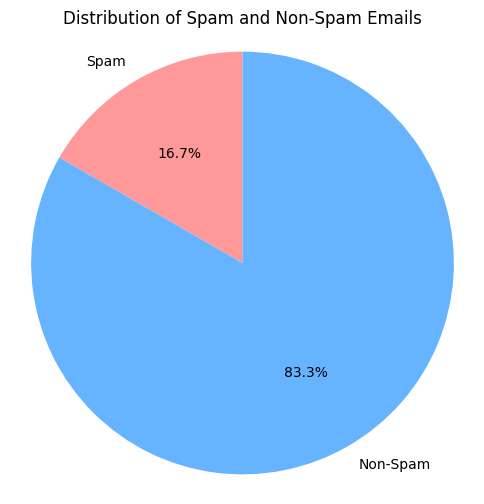

In [ ]:
# Load the dataset
emails, labels = load_dataset()

# Count the number of spam and non-spam emails
spam_count = np.sum(labels)
non_spam_count = len(labels) - spam_count

# Visualize the distribution
labels = ['Spam', 'Non-Spam']
sizes = [spam_count, non_spam_count]
colors = ['#ff9999', '#66b3ff']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Spam and Non-Spam Emails')
plt.show()

# **CONTOH EMAIL SPAM DAN NON SPAM DARI DATASET**

Menunjukkan contoh email spam dan non spam dari dataset spamassassin

In [ ]:
# Extracted dataset directories
spam_dir = "./spam"
ham_dir = "./easy_ham"

# Function to read email content
def read_email(directory, filename):
    file_path = os.path.join(directory, filename)
    with open(file_path, 'r', errors='ignore') as file:
        content = file.read()
    return content

# Get a random spam email
spam_emails = os.listdir(spam_dir)
random_spam_email = random.choice(spam_emails)
spam_email_content = read_email(spam_dir, random_spam_email)

print("Example of a spam email:")
print("-------------------------")
print(spam_email_content)
print("-------------------------\n")

# Get a random non-spam email
ham_emails = os.listdir(ham_dir)
random_ham_email = random.choice(ham_emails)
ham_email_content = read_email(ham_dir, random_ham_email)

print("Example of a non-spam email:")
print("-----------------------------")
print(ham_email_content)
print("-----------------------------\n")


Example of a spam email:
-------------------------
From haggen@freemail.nl  Wed Sep 25 10:29:12 2002
Return-Path: <haggen@freemail.nl>
Delivered-To: zzzz@localhost.jmason.org
Received: from localhost (jalapeno [127.0.0.1])
	by zzzzason.org (Postfix) with ESMTP id EA41316F03
	for <zzzz@localhost>; Wed, 25 Sep 2002 10:29:11 +0100 (IST)
Received: from jalapeno [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Wed, 25 Sep 2002 10:29:11 +0100 (IST)
Received: from webnote.net (mail.webnote.net [193.120.211.219]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g8P28HC04819 for
    <zzzz@jmason.org>; Wed, 25 Sep 2002 03:08:17 +0100
Received: from freemail.nl (200-161-16-177.dsl.telesp.net.br
    [200.161.16.177]) by webnote.net (8.9.3/8.9.3) with SMTP id DAA22151;
    Wed, 25 Sep 2002 03:08:34 +0100
Date: Wed, 25 Sep 2002 03:08:34 +0100
From: haggen@freemail.nl
Reply-To: <haggen@freemail.nl>
Message-Id: <004c10e04bea$8426d3c4$8ba66bd7@huvnsn>
To:

# **MODEL BUILDING & TRAINING**

**MODEL BUILDING**

In [ ]:

# Train the model
def train_model(emails, labels):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(emails, labels, test_size=0.2, random_state=42)
    
    # Tokenize the text
    tokenizer = Tokenizer(num_words=10000)
    tokenizer.fit_on_texts(X_train)
    
    X_train = tokenizer.texts_to_sequences(X_train)
    X_test = tokenizer.texts_to_sequences(X_test)
    
    # Padding
    max_sequence_length = 500
    X_train = pad_sequences(X_train, maxlen=max_sequence_length)
    X_test = pad_sequences(X_test, maxlen=max_sequence_length)
    
    # Build the model
    model = Sequential()
    model.add(Embedding(10000, 128, input_length=max_sequence_length))
    model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Train the model
    model.fit(X_train, y_train, batch_size=128, epochs=5, validation_data=(X_test, y_test))
    
    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print("Loss:", loss)
    print("Accuracy:", accuracy)
    
    return model, tokenizer

    

**MODEL TRAINING**

In [ ]:
    # Load the dataset
    emails, labels = load_dataset()

    # Train the model
    model, tokenizer = train_model(emails, labels)

Epoch 1/5
19/19 [==============================] - 56s 3s/step - loss: 0.4667 - accuracy: 0.8263 - val_loss: 0.2692 - val_accuracy: 0.8752
Epoch 2/5
19/19 [==============================] - 52s 3s/step - loss: 0.1652 - accuracy: 0.9546 - val_loss: 0.1368 - val_accuracy: 0.9651
Epoch 3/5
19/19 [==============================] - 51s 3s/step - loss: 0.0624 - accuracy: 0.9833 - val_loss: 0.0792 - val_accuracy: 0.9800
Epoch 4/5
19/19 [==============================] - 51s 3s/step - loss: 0.0228 - accuracy: 0.9963 - val_loss: 0.1111 - val_accuracy: 0.9734
Epoch 5/5
19/19 [==============================] - 3s 146ms/step - loss: 0.0440 - accuracy: 0.9850
Loss: 0.04404081031680107
Accuracy: 0.9850249290466309


# **MODEL TESTING**

**Contoh email yang akan diuji** : 

Subject: Make money fast!

Dear recipient,

Congratulations! You have been selected to participate in a unique opportunity to make money fast. Our revolutionary program guarantees that you can earn thousands of dollars in just a few days!

With our proven system, you don't need any experience or special skills. Simply follow our step-by-step guide and start making money immediately. Don't miss out on this incredible offer!

To get started, reply to this email with your full name and bank account details. Once we receive your information, we will provide you with further instructions on how to unlock your earning potential.

Remember, this is a limited-time opportunity. Act now and secure your financial future!

Best regards,
The Money Making Team

In [ ]:
# Function to classify user input email
def classify_email(email):
    # Preprocess the email
    email_sequence = tokenizer.texts_to_sequences([email])
    email_sequence = pad_sequences(email_sequence, maxlen=500)
    
    # Classify the email
    prediction = model.predict(email_sequence)
    spam_probability = prediction[0][0]
    
    if spam_probability > 0.5:
        return "This email is classified as spam."
    else:
        return "This email is not spam."

# Get user input email
user_email = input("Enter an email: ")

# Classify the user input email
classification = classify_email(user_email)
print(classification)

Enter an email: Subject: ***SPAM*** Make money fast!  Dear recipient,  Congratulations! You have been selected to participate in a unique opportunity to make money fast. Our revolutionary program guarantees that you can earn thousands of dollars in just a few days!  With our proven system, you don't need any experience or special skills. Simply follow our step-by-step guide and start making money immediately. Don't miss out on this incredible offer!  To get started, reply to this email with your full name and bank account details. Once we receive your information, we will provide you with further instructions on how to unlock your earning potential.  Remember, this is a limited-time opportunity. Act now and secure your financial future!  Best regards, The Money Making Team
1/1 [==============================] - 0s 68ms/step
This email is classified as spam.


# **KESIMPULAN**

Dari pengujian dapat kita ambil kesimpulan, melalui penggunaan neural network dalam proyek ini, model berhasil mengklasifikasikan email-email sebagai spam atau non-spam dengan akurasi yang dapat diandalkan. Dengan mempelajari pola dan karakteristik email spam, model dapat mengenali ciri-ciri khas yang membedakan email spam dari non-spam. Penggunaan neural network dalam klasifikasi email spam memungkinkan kita untuk secara efektif mengidentifikasi dan memfilter email-email yang tidak diinginkan, meningkatkan pengalaman pengguna dan keamanan komunikasi melalui email.